<a href="https://colab.research.google.com/github/baochuong/Articial-Intelligence-AI-/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from keras.datasets import cifar10
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
x_test.shape

(10000, 32, 32, 3)

In [12]:
y_test.shape

(10000, 1)

So nay la: [4]


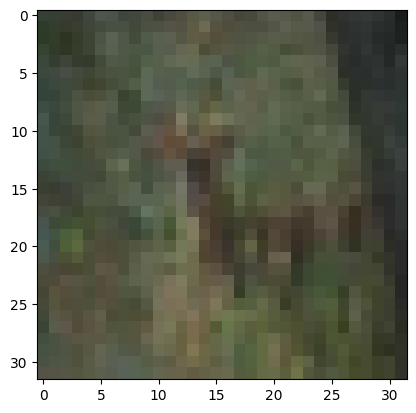

In [16]:
import matplotlib.pyplot as plt
hinh= x_train[10]   #Lấy hình ở vị trí thứ 10
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show
print("So nay la:",y_train[10])

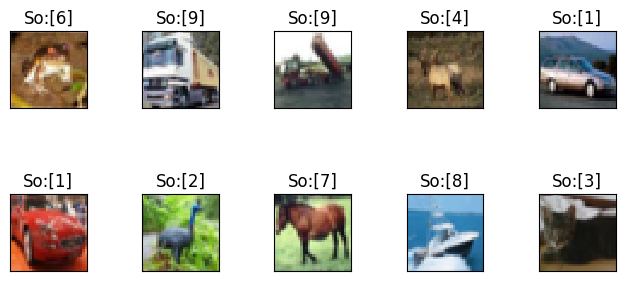

In [17]:
for i in range(10):
  plt.subplot(3,5,i+1)  # 2 hàng 5 cột 
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title("So:{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [18]:
from keras.models import Sequential
from keras.layers import Dense

model= Sequential()
model.add(Dense(512, input_shape = (32*32*3,), activation = 'relu'))
model.add(Dense(10,activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


In [19]:
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

In [20]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [23]:
from keras.models import load_model
# Tải mô hình từ file đã lưu
model = load_model('./model_cifar10.h5')

In [24]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs = 10, batch_size= 128) # Mỗi lần học 128 dữ liệu, học tổng cộng 10 lần
test_loss, test_acc = model.evaluate(x_test,y_test)
print('test_accuracy:',test_acc)
print('test_loss:',test_loss)
model.save('model_cifar10.h5')

Epoch 1/10
391/391 [==============================] - 15s 36ms/step - loss: 0.5068 - accuracy: 0.8259
Epoch 2/10
391/391 [==============================] - 13s 34ms/step - loss: 0.4961 - accuracy: 0.8252
Epoch 3/10
391/391 [==============================] - 13s 34ms/step - loss: 0.4932 - accuracy: 0.8263
Epoch 4/10
391/391 [==============================] - 14s 35ms/step - loss: 0.4988 - accuracy: 0.8248
Epoch 5/10
391/391 [==============================] - 14s 35ms/step - loss: 0.4924 - accuracy: 0.8283
Epoch 6/10
391/391 [==============================] - 13s 34ms/step - loss: 0.4967 - accuracy: 0.8263
Epoch 7/10
391/391 [==============================] - 14s 36ms/step - loss: 0.4932 - accuracy: 0.8282
Epoch 8/10
391/391 [==============================] - 14s 37ms/step - loss: 0.4892 - accuracy: 0.8308
Epoch 9/10
391/391 [==============================] - 13s 34ms/step - loss: 0.4874 - accuracy: 0.8290
Epoch 10/10
313/313 [==============================] - 2s 7ms/step - loss: 5.7101 

In [25]:
model.save('model_cifar10.h5')

1/1 [==============================] - 0s 95ms/step


array([4])

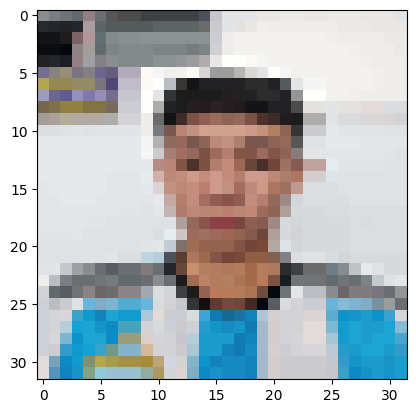

In [26]:
from keras.utils import load_img
import matplotlib.pyplot as plt

img = load_img('20146481_270323.gif',target_size=(32,32))
plt.imshow(img)

import numpy as np
from keras.utils.image_utils import img_to_array
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis=-1)